In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
image_size = x_train.shape[1]
print(image_size)

28


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_train = np.reshape(x_train,[-1, image_size, image_size])
print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_test = np.reshape(x_test, [-1, image_size, image_size])
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [ ]:
model = Sequential()
model.add(SimpleRNN(units,dropout=dropout,input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               72960     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


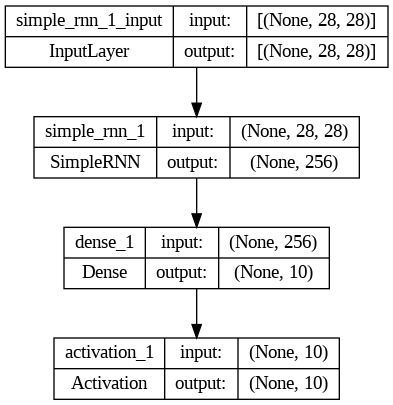

In [ ]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 32s 64ms/step - loss: 0.7621 - accuracy: 0.7811
Epoch 2/20
469/469 [==============================] - 29s 62ms/step - loss: 0.3250 - accuracy: 0.9048
Epoch 3/20
469/469 [==============================] - 29s 62ms/step - loss: 0.2444 - accuracy: 0.9276
Epoch 4/20
469/469 [==============================] - 31s 65ms/step - loss: 0.2016 - accuracy: 0.9390
Epoch 5/20
469/469 [==============================] - 29s 62ms/step - loss: 0.1739 - accuracy: 0.9485
Epoch 6/20
469/469 [==============================] - 29s 61ms/step - loss: 0.1538 - accuracy: 0.9540
Epoch 7/20
469/469 [==============================] - 29s 62ms/step - loss: 0.1422 - accuracy: 0.9571
Epoch 8/20
469/469 [==============================] - 29s 63ms/step - loss: 0.1267 - accuracy: 0.9625
Epoch 9/20
469/469 [==============================] - 30s 64ms/step - loss: 0.1188 - accuracy: 0.9645
Epoch 10/20
469/469 [==============================] - 29s 62ms/step - loss: 0.113

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 2s 20ms/step - loss: 0.0850 - accuracy: 0.9729

Test accuracy: 97.3%
